<a href="https://colab.research.google.com/github/DiogoSabec/Bootstrap-test/blob/main/Colabs/AI/C%C3%B3pia_de_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [ ]:
X = dataset.drop(columns=['median_house_value'])  # Todos os atributos exceto o valor alvo
y = dataset['median_house_value']  # Valor alvo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
regressor = LinearRegression()

In [ ]:
# Inicializar variáveis para armazenar o menor erro e o melhor atributo
best_attribute = None
best_mse = float('inf')

In [ ]:
# Iterar sobre os atributos para calcular o erro para cada um
for column in X.columns:
    # Selecionar o atributo atual
    X_train_curr = X_train[[column]]
    X_test_curr = X_test[[column]]

    # Treinar o modelo
    regressor.fit(X_train_curr, y_train)

    # Fazer previsões
    y_pred = regressor.predict(X_test_curr)

    # Calcular o erro (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Atualizar o melhor atributo se necessário
    if mse < best_mse:
        best_mse = mse
        best_attribute = column

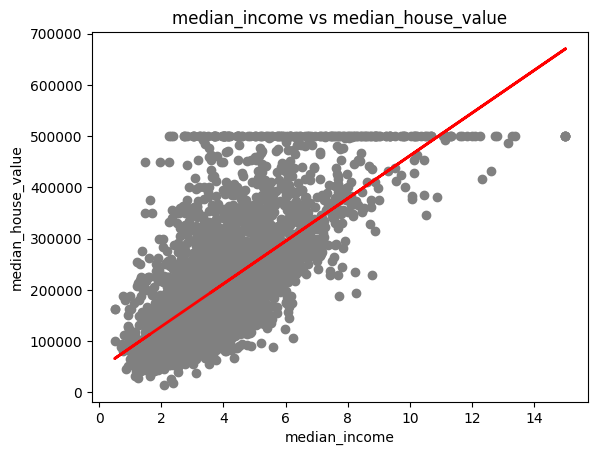

In [ ]:
# Plotar o atributo selecionado contra o valor alvo
plt.scatter(X_test[best_attribute], y_test, color='gray')
plt.plot(X_test[best_attribute], y_pred, color='red', linewidth=2)
plt.title('{} vs median_house_value'.format(best_attribute))
plt.xlabel(best_attribute)
plt.ylabel('median_house_value')
plt.show()

In [ ]:
# Imprimir o melhor atributo e o MSE correspondente
print("Melhor atributo:", best_attribute)
print("MSE correspondente:", best_mse)

Melhor atributo: median_income
MSE correspondente: 6920028496.010729


Para escolher o melhor atributo, utilizei o MSE como métrica de avaliação do desempenho do modelo de regressão linear para cada atributo. O atributo que resultou no menor MSE foi selecionado como o melhor, pois proporcionou as previsões mais precisas para o valor alvo (median_house_value).

Isso indica que esse atributo tem uma relação mais forte com o valor alvo em comparação com os outros atributos.

Portanto, o atributo selecionado é aquele que melhor descreve a predição do valor médio das casas por meio da técnica de regressão linear.

O melhor resultado foi obtido ao escolher o atributo "median_income". Isso significa que o nível de renda médio tem uma forte relação com o valor médio das casas na Califórnia. Escolher esse atributo como preditor resulta em previsões mais precisas do valor das casas.